##  Project objects
- Clean dirty log data and transform it for analytics.
- Exploratory data analysis, e.g. find user activity levels for different events, and user interaction with web components.
- Find the conversion rate of users, identify key factors that bottleneck the conversion rate.
- Propose any hypothesis and set up experiments for testing.
- Build machine learning models to predict user behaviors, including but not limited to signup, churn, etc.
- Discover interesting insights in the dataset and suggest how to improve the user signup rate.

In [1]:
import pandas as pd
import json

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

# Always make it pretty.
plt.style.use('ggplot')

In [3]:
# Load data from file
df = pd.read_csv('data/cleaned_data.csv')

In [4]:
df.head()

,dist_id,event,browser,browser_v,day,is_fd,is_ft,ip,latest_utm_s,latest_utm_m,...,os_version,pageS,time,CN,CT,source,cpc,weekend,signup,freq
0,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,chrome,56.0,2017-03-06,True,False,219.135.131.99,baidu,cpc,...,6.1,5.692,1488791047953,1,Guangzhou,1,1,0,0,2
1,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,chrome,56.0,2017-03-06,True,True,111.204.198.242,NaN,NaN,...,10.0,NaN,1488791050856,0,0,0,0,0,0,21
2,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,chrome,56.0,2017-03-06,True,False,111.204.198.242,NaN,NaN,...,10.0,NaN,1488791051772,1,Beijing,0,0,0,0,21
3,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,chrome,56.0,2017-03-06,True,False,111.204.198.242,NaN,NaN,...,10.0,NaN,1488791056032,1,Beijing,0,0,0,0,21
4,595466e9a8e733434ce08de16e927d985e0b5d48,demo_leave,chrome,56.0,2017-03-06,True,False,219.135.131.99,baidu,cpc,...,6.1,21.291,1488791057880,1,Beijing,1,1,0,0,2


In [5]:
df.shape

(65673, 22)

In [6]:
avg_st = df[['dist_id','pageS']].groupby(['dist_id']).mean()

In [8]:
avg_st[0:5]

,pageS
dist_id,
00007ef910b6c9911f1b89d01a09aa3fc862f4a9,NaN
000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,921142.371000
000c46a27ef69fa22b56d253a9c72773338a1686,1742.216571
000ed1dcd942969b458c5b308937c6389c08f999,30.680000
00111feff544ef5280a4c7064a362a9ea59c9389,NaN


In [9]:
count = []
df_new = pd.DataFrame()
grouped = df.groupby('dist_id')
for name, group in grouped:
    ct = 0
    for index, row in group.iterrows():
        if group.event[index] != "formSubmit" and ct != group.shape[0]-1:
            ct+=1
        else:
            df_new = df_new.append(group.loc[index])
            ct+=1
            count.append(ct)
            break

In [10]:
df_new.head()

,CN,CT,browser,browser_v,cpc,day,dist_id,event,freq,ip,...,latest_utm_m,latest_utm_s,model,os,os_version,pageS,signup,source,time,weekend
6051,1.0,Hangzhou,qq,7.3,0.0,2017-03-06,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,formSubmit,6.0,36.23.47.33,...,mcpc,baidu,iphone,iOS,10.20,NaN,1.0,1.0,1.488866e+12,0.0
46921,1.0,Guangzhou,chrome,56.0,1.0,2017-03-12,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,1.0,111.193.183.253,...,cpc,baidu,mac,macosx,10.12,921142.371,0.0,1.0,1.489374e+12,1.0
7243,1.0,Shenzhen,chrome,56.0,0.0,2017-03-07,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,22.0,27.38.250.222,...,NaN,NaN,pc,windows,10.00,NaN,0.0,0.0,1.488871e+12,0.0
47483,1.0,Hangzhou,qq,9.5,0.0,2017-03-12,000ed1dcd942969b458c5b308937c6389c08f999,$pageview,4.0,116.226.32.214,...,NaN,sanjieke.cn,pc,windows,10.00,NaN,0.0,0.0,1.489376e+12,1.0
28974,1.0,Chengdu,safari,9.0,0.0,2017-03-09,00111feff544ef5280a4c7064a362a9ea59c9389,$pageview,1.0,117.136.38.216,...,mcpc,baidu,iphone,iOS,9.00,NaN,0.0,1.0,1.489059e+12,0.0


In [11]:
df_new.shape

(11708, 22)

In [12]:
df_new['count'] = count

In [13]:
df_new['avg_st'] = avg_st.values

In [14]:
df_new

,CN,CT,browser,browser_v,cpc,day,dist_id,event,freq,ip,...,model,os,os_version,pageS,signup,source,time,weekend,count,avg_st
6051,1.0,Hangzhou,qq,7.30000,0.0,2017-03-06,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,formSubmit,6.0,36.23.47.33,...,iphone,iOS,10.20,NaN,1.0,1.0,1.488866e+12,0.0,5,NaN
46921,1.0,Guangzhou,chrome,56.00000,1.0,2017-03-12,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,1.0,111.193.183.253,...,mac,macosx,10.12,921142.371,0.0,1.0,1.489374e+12,1.0,1,921142.371000
7243,1.0,Shenzhen,chrome,56.00000,0.0,2017-03-07,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,22.0,27.38.250.222,...,pc,windows,10.00,NaN,0.0,0.0,1.488871e+12,0.0,22,1742.216571
47483,1.0,Hangzhou,qq,9.50000,0.0,2017-03-12,000ed1dcd942969b458c5b308937c6389c08f999,$pageview,4.0,116.226.32.214,...,pc,windows,10.00,NaN,0.0,0.0,1.489376e+12,1.0,4,30.680000
28974,1.0,Chengdu,safari,9.00000,0.0,2017-03-09,00111feff544ef5280a4c7064a362a9ea59c9389,$pageview,1.0,117.136.38.216,...,iphone,iOS,9.00,NaN,0.0,1.0,1.489059e+12,0.0,1,NaN
22480,1.0,Zhengzhou,chrome,56.00000,1.0,2017-03-08,0011f5066b1c62717255852fdb15a0473a5c2b19,$pageview,6.0,119.57.163.82,...,mac,macosx,10.12,NaN,0.0,1.0,1.489029e+12,0.0,6,4.170000
3663,0.0,Nonthaburi,chrome,56.00000,1.0,2017-03-06,0012ea1b517e6959354abaa6954711054ec831b9,index_leave,2.0,101.71.245.170,...,pc,windows,6.10,35.747,0.0,1.0,1.488851e+12,0.0,2,35.747000
28509,1.0,Beijing,na,-1.00000,0.0,2017-03-09,002232cd6da95fae1cc9a5fbaa7c2d0e11fbd57b,index_leave,3.0,223.73.25.141,...,oppo,Android,4.20,18.916,0.0,1.0,1.489055e+12,0.0,3,18.916000
21090,1.0,NaN,micromessenger,6.50000,0.0,2017-03-08,00229f012ef316de6efdcbc380ffdb2558e9ff81,$pageview,3.0,223.104.38.131,...,iphone,iOS,10.00,NaN,0.0,0.0,1.489022e+12,0.0,3,NaN
39158,1.0,Wuhan,qq,6.00000,0.0,2017-03-10,0023b8aa9adf510ef81d0e90e175d809f2bf6059,$pageview,1.0,153.37.200.192,...,android,Android,6.00,NaN,0.0,1.0,1.489157e+12,0.0,1,NaN


In [15]:
df_new.shape

(11708, 24)

In [16]:
df_new.isnull().sum()

CN                 0
CT               168
browser            0
browser_v          0
cpc                0
day                0
dist_id            0
event              0
freq               0
ip                 0
is_fd              0
is_ft              0
latest_utm_m    4488
latest_utm_s    4395
model              0
os                 0
os_version         0
pageS           6137
signup             0
source             0
time               0
weekend            0
count              0
avg_st          4296
dtype: int64

## Dataset Description

- browser
- browser version
- cost per click: source medium 
- the day of this event
- is first day
- is first time
- event
- frequency (total)
- utm_source
- utm_medium
- ip address
- user source
- model (pc or mac or cellphone)
- operation system
- os version
- page stay time
- time 
- is ip address in China
- ip address location city
- is the time in weekend
- did the user sign up 
- count user interactions before form submit
- average stay time on page

Explore data

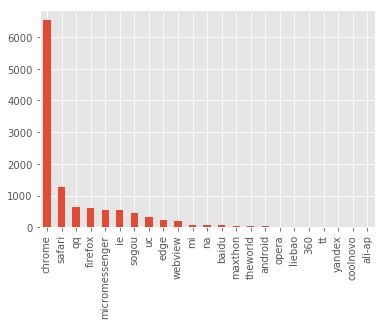

In [17]:
df_new['browser'].value_counts(dropna=False).plot.bar()

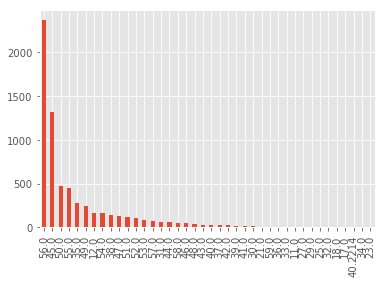

In [18]:
df_new.loc[df['browser'] == 'chrome']['browser_v'].value_counts(dropna=False).plot.bar()

In [22]:
df_new['browser_chrome'] = np.where(df_new['browser'] == 'chrome', '1', '0')

In [23]:
df_new['browser_chrome'].value_counts(dropna=False)

1    6531
0    5177
Name: browser_chrome, dtype: int64

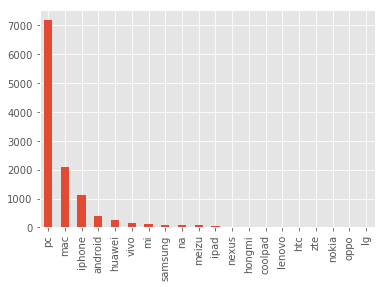

In [24]:
df_new['model'].value_counts(dropna=False).plot.bar()

In [31]:
df_new['model_bin'] = df_new['model'] 

In [39]:
df_new.model_bin[~df_new.model.isin(['pc','mac'])] = 'others'

#s[s.index.isin([2, 4, 6])]

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_new['model_bin'].value_counts(dropna=False)

pc        7178
others    2439
mac       2091
Name: model_bin, dtype: int64

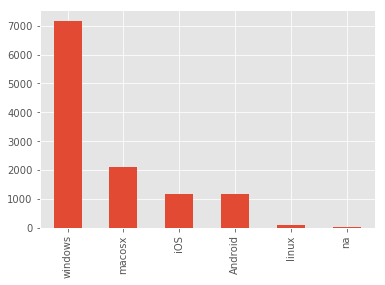

In [43]:
df_new['os'].value_counts(dropna=False).plot.bar()

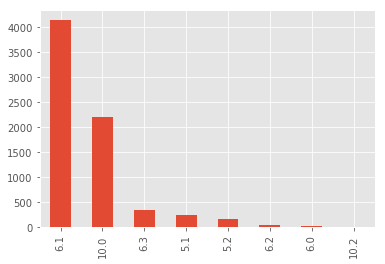

In [56]:
df_new.loc[df['os'] == 'windows']['os_version'].value_counts(dropna=False).plot.bar()

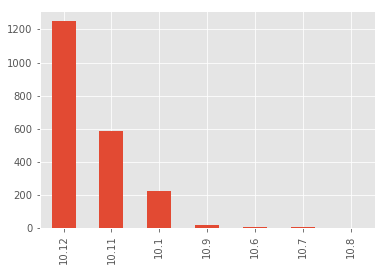

In [57]:
df_new.loc[df['os'] == 'macosx']['os_version'].value_counts(dropna=False).plot.bar()

In [64]:
df_new['os_bin'] = df_new['os'] 

In [65]:
df_new.os_bin[~df_new.os.isin(['windows','macosx'])] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_new['os_bin'].value_counts(dropna=False)

windows    7178
others     2439
macosx     2091
Name: os_bin, dtype: int64

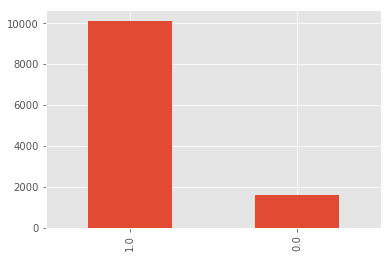

In [68]:
df_new['CN'].value_counts(dropna=False).plot.bar()

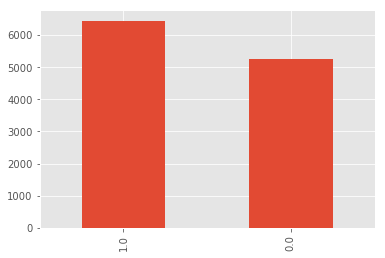

In [69]:
df_new['source'].value_counts(dropna=False).plot.bar()

might need to change source, create another value for nan: these people might already know sensordata, and go to the website directly.

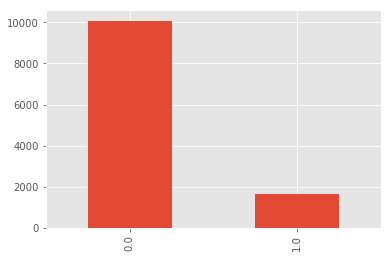

In [70]:
df_new['weekend'].value_counts(dropna=False).plot.bar()

Most people know or check this website for work. The number of interactions on weekends is small.

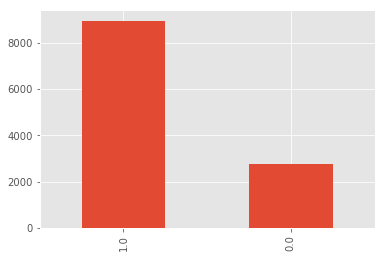

In [71]:
df_new['is_fd'].value_counts(dropna=False).plot.bar()

Some people come the other day

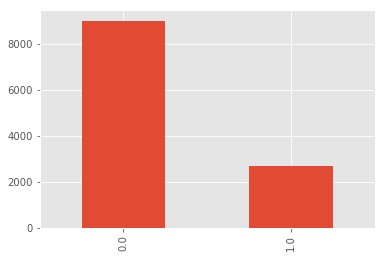

In [72]:
df_new['is_ft'].value_counts(dropna=False).plot.bar()

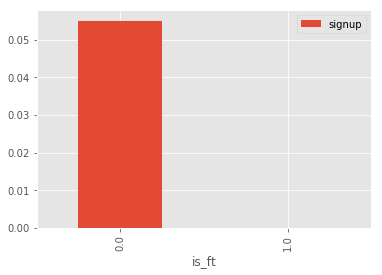

In [73]:
df_new[['is_ft', 'signup']].groupby(['is_ft']).mean().plot.bar()

## Clean data - dealing with missing values

In [74]:
# Count missing values by column
df_new.isnull().sum()

CN                   0
CT                 168
browser              0
browser_v            0
cpc                  0
day                  0
dist_id              0
event                0
freq                 0
ip                   0
is_fd                0
is_ft                0
latest_utm_m      4488
latest_utm_s      4395
model                0
os                   0
os_version           0
pageS             6137
signup               0
source               0
time                 0
weekend              0
count                0
avg_st            4296
browser_chrome       0
model_bin            0
os_bin               0
dtype: int64

In [76]:
df_new[['latest_utm_s','source']].head()

,latest_utm_s,source
6051,baidu,1.0
46921,baidu,1.0
7243,NaN,0.0
47483,sanjieke.cn,0.0
28974,baidu,1.0


In [77]:
# Fill missing value for latest_utm_s, make the nan source from sensordata itself
df_new['latest_utm_s'] = df_new['latest_utm_s'].fillna('sensordata')

In [78]:
df_new['CT_bin'] = df_new['CT']

In [80]:
df_new.CT_bin[~df_new.CT.isin(['Beijing','Shanghai','Guangzhou'])] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
df_new['CT_bin'].value_counts(dropna=False)

others       5292
Beijing      4041
Shanghai     1219
Guangzhou    1156
Name: CT_bin, dtype: int64

In [101]:
import geoip2.database
# read library from local file
reader = geoip2.database.Reader('./data/GeoLite2-City_20180206/GeoLite2-City.mmdb')

In [103]:
# too many cities, use province to do analysis
PRO=[]
for index, row in df_new.iterrows():
    try:
        PRO.append(reader.city(df_new.loc[index,'ip']).subdivisions.most_specific.iso_code) 
    except:
        PRO.append('0')

In [104]:
df_new['PRO'] = PRO

In [107]:
df_new['PRO_bin'] = df_new['PRO']

In [108]:
df_new.PRO_bin[~df_new.PRO.isin(['BJ','GD','SH','ZJ'])] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
df_new['PRO_bin'].value_counts(dropna=False)

BJ        4014
others    2832
GD        2430
SH        1388
ZJ        1044
Name: PRO_bin, dtype: int64

In [110]:
df_new.describe()

,CN,browser_v,cpc,freq,is_fd,is_ft,os_version,pageS,signup,source,time,weekend,count,avg_st
count,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,5.571000e+03,11708.000000,11708.000000,1.170800e+04,11708.000000,11708.000000,7.412000e+03
mean,0.864622,33.023361,0.470362,5.609242,0.764178,0.229587,7.753071,1.009756e+04,0.042450,0.550820,1.489164e+12,0.139136,4.987444,7.860027e+03
std,0.342141,21.660523,0.499142,10.500759,0.424529,0.420585,2.205608,6.525297e+04,0.201621,0.497432,2.263144e+08,0.346103,9.048549,6.512723e+04
min,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,3.300000e-02,0.000000,0.000000,1.488791e+12,0.000000,1.000000,3.300000e-02
25%,1.000000,9.500000,0.000000,1.000000,1.000000,0.000000,6.100000,7.478000e+00,0.000000,0.000000,1.488965e+12,0.000000,1.000000,8.976813e+00
50%,1.000000,45.000000,0.000000,2.000000,1.000000,0.000000,6.200000,2.704500e+01,0.000000,1.000000,1.489130e+12,0.000000,2.000000,3.236250e+01
75%,1.000000,55.000000,1.000000,5.000000,1.000000,0.000000,10.000000,5.896960e+02,0.000000,1.000000,1.489391e+12,0.000000,5.000000,4.707285e+02
max,1.000000,59.000000,1.000000,254.000000,1.000000,1.000000,10.900000,1.749192e+06,1.000000,1.000000,1.489517e+12,1.000000,254.000000,2.918014e+06


### Explore sign up rate split by features 

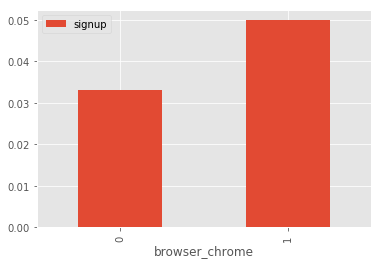

In [112]:
df_new[['browser_chrome', 'signup']].groupby(['browser_chrome']).mean().plot.bar()

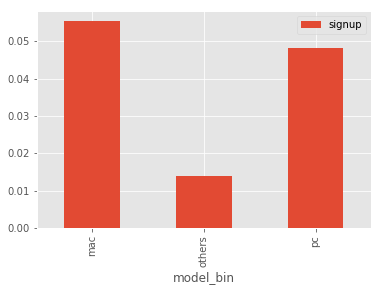

In [114]:
df_new[['model_bin', 'signup']].groupby(['model_bin']).mean().plot.bar()

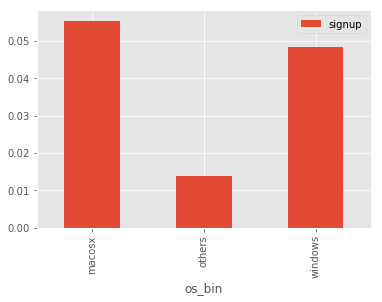

In [115]:
df_new[['os_bin', 'signup']].groupby(['os_bin']).mean().plot.bar()

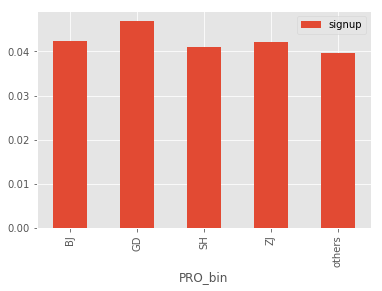

In [116]:
df_new[['PRO_bin', 'signup']].groupby(['PRO_bin']).mean().plot.bar()

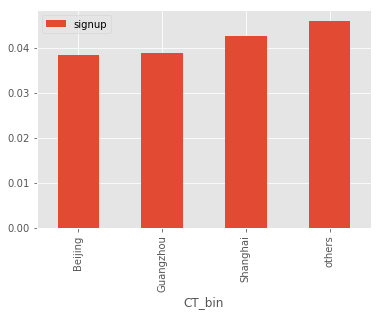

In [117]:
df_new[['CT_bin', 'signup']].groupby(['CT_bin']).mean().plot.bar()

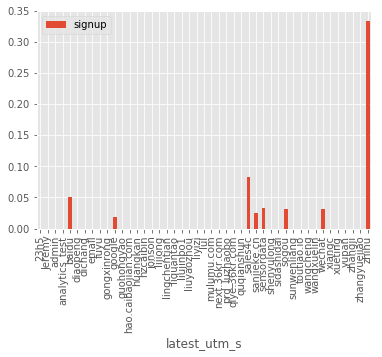

In [118]:
df_new[['latest_utm_s', 'signup']].groupby(['latest_utm_s']).mean().plot.bar()

In [119]:
df_new['latest_utm_s'].value_counts(dropna=False)

baidu                 6449
sensordata            4395
sogou                  562
google                 111
wechat                  63
sanjieke.cn             39
next.36kr.com           16
admin                   14
sales4c                 12
toutiao.io               4
zhihu                    3
yupan                    2
email                    2
mulumu.com               2
shenyulong               2
23h5                     2
sunwenliang              2
liuyaozhou               1
lingchentian             1
lul                      1
prd_luzhaobo             1
liujinbo1                1
analytics_test           1
wangcheng                1
Jeremy                   1
diaopeng                 1
zhangyuejiao             1
hao.caibaojian.com       1
xueting                  1
sidashidai               1
liyizi                   1
hzcaibin                 1
lijiong                  1
gongxinrong              1
guohongyao               1
xiangc                   1
zhangji                  1
j

In [121]:
df_new.source[~df_new.latest_utm_s.isin(['baidu','sensordata'])] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
df_new['source'].value_counts(dropna=False)

1.0       6449
0.0       4395
others     864
Name: source, dtype: int64

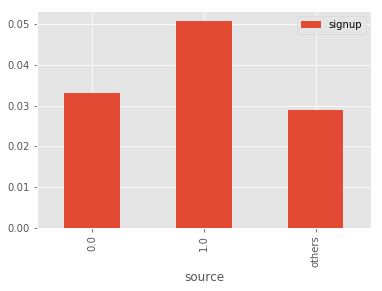

In [124]:
df_new[['source', 'signup']].groupby(['source']).mean().plot.bar()

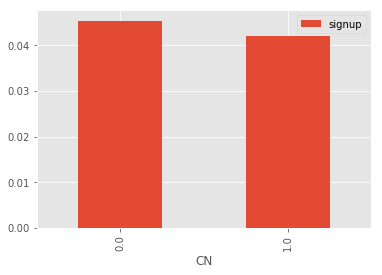

In [125]:
df_new[['CN', 'signup']].groupby(['CN']).mean().plot.bar()

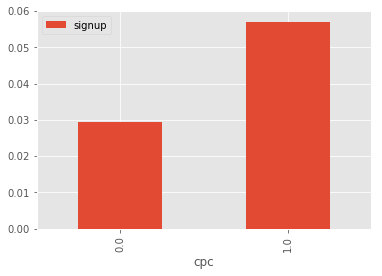

In [138]:
df_new[['cpc', 'signup']].groupby(['cpc']).mean().plot.bar()

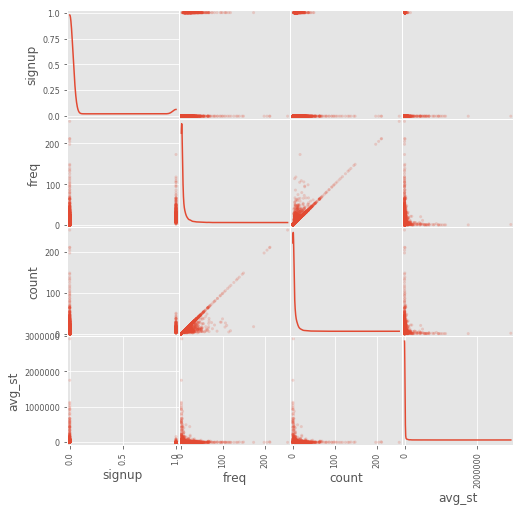

In [126]:
# Use scatter_matrix from Pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df_new[[u'signup', u'freq', u'count',u'avg_st']], 
               alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()

People not in China has higher sign up rate

over 1200 users in China, try to create a column for different user interaction of the day

In [127]:
import datetime

In [128]:
def to_hour(epoch):
    return datetime.datetime.fromtimestamp(epoch/1000).strftime('%H')
# first convert from milliseconds to seconds, and then convert format from time stamp

In [129]:
#df.apply(lambda row: EOQ(row['D'], row['p'], ck, ch), axis=1)
df_new['hour'] = df_new['time'].apply(lambda row: (int(to_hour(row))))

In [130]:
df_new['hour'].head()

6051     23
46921    21
7243      1
47483    22
28974     5
Name: hour, dtype: int64

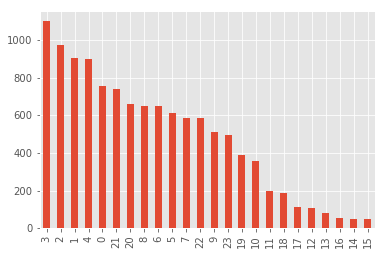

In [131]:
df_new['hour'].value_counts(dropna=False).plot.bar()

Convert UTC time to Beijing Time, work time (8-17) is (0-9)

In [132]:
df_new['worktime'] = ((df_new.hour >= 0) & (df_new.hour <= 9)) * 1

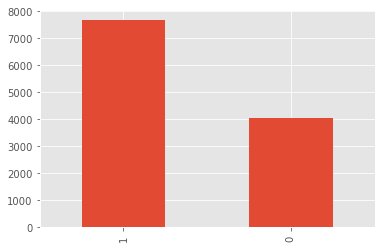

In [133]:
df_new['worktime'].value_counts(dropna=False).plot.bar()

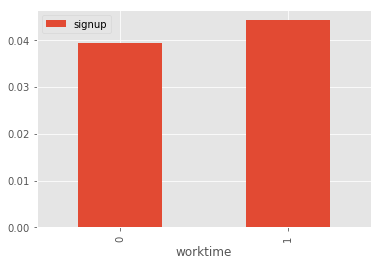

In [134]:
df_new[['worktime', 'signup']].groupby(['worktime']).mean().plot.bar()

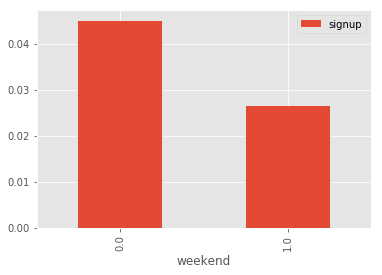

In [135]:
df_new[['weekend', 'signup']].groupby(['weekend']).mean().plot.bar()

People has same signup rate over the weekends

In [136]:
df_new.columns

Index(['CN', 'CT', 'browser', 'browser_v', 'cpc', 'day', 'dist_id', 'event',
       'freq', 'ip', 'is_fd', 'is_ft', 'latest_utm_m', 'latest_utm_s', 'model',
       'os', 'os_version', 'pageS', 'signup', 'source', 'time', 'weekend',
       'count', 'avg_st', 'browser_chrome', 'model_bin', 'os_bin', 'CT_bin',
       'PRO', 'PRO_bin', 'hour', 'worktime'],
      dtype='object')

In [137]:
selected_data_csv = 'data/selected_data.csv'
df_new.to_csv(selected_data_csv, index=False)